# ANALYSIS FOR BOLT

## GOALS
- Identify subset with largest impact on attrition rate
- Devise data-driven recommendations to decrease attrition rate
- Outline what success looks like, measurements of efficacy

## START ANALYSIS

- `CLIENTNUM`: Client Number (Identifier)
- `Attrition_Flag`: Whether the customer is attrited (stopped using the product) or is still a current customer
- `Customer_Age`: Customer's Age in Years
- `Gender`:  M=Male, F=Female
- `Dependent_count`: Number of dependents google dependent count for more information
- `Marital Status`: Married, Single, Divorced, Unknown
- `Income Catergory`: Annual Income Category of the account holder
- `Card Category`: Type of Card (Blue, Silver, Gold, Platinum)
- `Month On Book`: Length of relationship with BlueChip Credit (how long they have been a customer)
- `Months_Inactive_12_mon`: No. of months inactive in the last 12 months
- `Contacts_Count_12_mon`: No. of Contacts in the last 12 months

### Set up

In [1]:
# Packages installation
install.packages("plotly")
install.packages("GGally")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [2]:
# Libraries
library(GGally)
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(plotly)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [3]:
# Read data
data <- read_delim("/home/jupyter/datathon/dataset.csv", delim = ";")
head(data, 6)

Rows: 10168 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (6): Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Cat...
dbl (7): CLIENTNUM, Customer_Age, Dependent_count, Months_on_book, Total_Rel...
num (1): Credit_Limit

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
768805383,Attrited Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716
713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010


### Clean data
No missing values but there are rows with 'Unknown' values

In [4]:
# Recode Age Group
data$age_group[data$Customer_Age <= 25] <- "18-25"
data$age_group[25 < data$Customer_Age & data$Customer_Age < 40] <- "26-39"
data$age_group[40 <= data$Customer_Age & data$Customer_Age < 50] <- "40-49"
data$age_group[50 <= data$Customer_Age & data$Customer_Age < 60] <- "50-59"
data$age_group[60 <= data$Customer_Age & data$Customer_Age < 70] <- "60-69"
data$age_group[70 <= data$Customer_Age & data$Customer_Age < 80] <- "70-79"

Warning message:
“Unknown or uninitialised column: `age_group`.”


In [5]:
# Check duplicate

# Remove unknowns - Education_Level, Marital_Status, Income_Category
sum(is.na(data))
filtered_data <- data %>%
    filter(Education_Level != 'Unknown', 
          Marital_Status != 'Unknown', 
          Income_Category != 'Unknown')

dim(filtered_data)

[1] 0

[1] 7319   15

**NOTE**: From onwards only used `cleaned_data` as dataset nma vi chua clean nen tam dung `data`

In [6]:
# Split data
attritioned <- data %>%
  filter(Attrition_Flag == "Attrited Customer")

existing <- data %>%
  filter(Attrition_Flag != "Attrited Customer")

### Summary of dataset

In [7]:
# Dimension of dataset
dim(data)
dim(attritioned)
dim(existing)

[1] 10168    15

[1] 2192   15

[1] 7976   15

In [8]:
## Categorize columns into data types
# Quantitative
quantitative_col <- c('Customer_Age', 'Dependent_count', 'Months_on_book', 
                      'Total_Relationship_Count', 'Months_Inactive_12_mon', 
                      'Contacts_Count_12_mon', 'Credit_Limit')

summary(data[quantitative_col])

  Customer_Age   Dependent_count Months_on_book Total_Relationship_Count
 Min.   :18.00   Min.   :0.000   Min.   :13     Min.   :1.000           
 1st Qu.:40.00   1st Qu.:1.000   1st Qu.:32     1st Qu.:3.000           
 Median :46.00   Median :2.000   Median :36     Median :4.000           
 Mean   :44.73   Mean   :2.346   Mean   :36     Mean   :3.809           
 3rd Qu.:51.00   3rd Qu.:3.000   3rd Qu.:40     3rd Qu.:5.000           
 Max.   :73.00   Max.   :5.000   Max.   :56     Max.   :6.000           
 Months_Inactive_12_mon Contacts_Count_12_mon  Credit_Limit  
 Min.   :0.000          Min.   :0.000         Min.   : 1439  
 1st Qu.:2.000          1st Qu.:2.000         1st Qu.: 2781  
 Median :2.000          Median :2.000         Median : 5370  
 Mean   :2.344          Mean   :2.446         Mean   : 9245  
 3rd Qu.:3.000          3rd Qu.:3.000         3rd Qu.:13547  
 Max.   :6.000          Max.   :6.000         Max.   :34516  

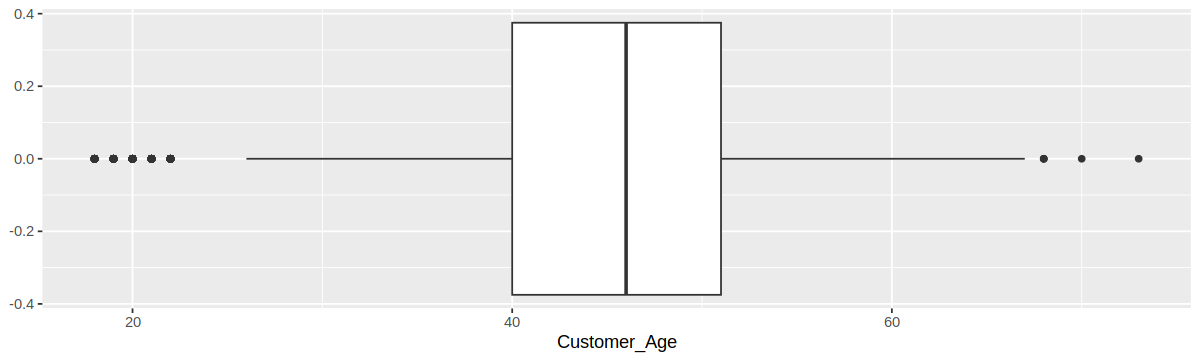

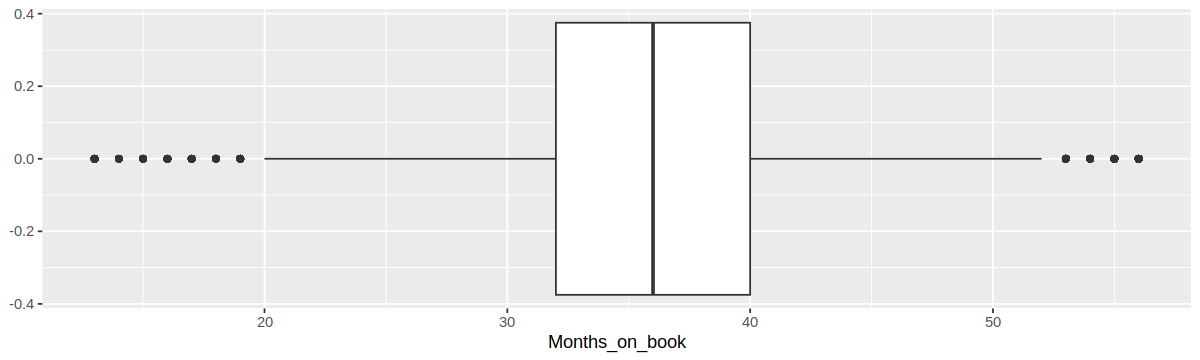

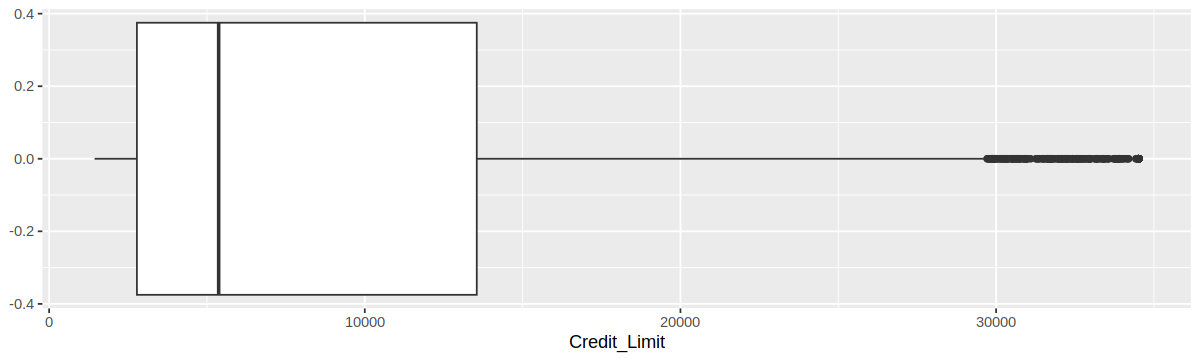

In [9]:
options(repr.plot.width = 10, repr.plot.height = 3)
# Boxplot for age distribution
ggplot(data, aes(y = Customer_Age)) + 
  geom_boxplot() +
  coord_flip()

ggplot(data, aes(y = Months_on_book)) + 
  geom_boxplot() +
  coord_flip()

ggplot(data, aes(y = Credit_Limit)) + 
  geom_boxplot() +
  coord_flip()

In [10]:
# Categorical
unique(data$Attrition_Flag)
unique(data$Gender)
unique(data$Education_Level)
unique(data$Marital_Status)
unique(data$Income_Category)
unique(data$Card_Category)

[1] "Attrited Customer" "Existing Customer"

[1] "M" "F"

[1] "High School"   "Graduate"      "Uneducated"    "College"      
[5] "Unknown"       "Post-Graduate" "Doctorate"

[1] "Married"  "Single"   "Unknown"  "Divorced"

[1] "$60K - $80K"    "Less than $40K" "$80K - $120K"   "$40K - $60K"   
[5] "$120K +"        "Unknown"

[1] "Blue"     "Gold"     "Platinum" "Silver"

**NOTE**: Education_Level, Marital_Status, Income_Category contains 'Unknown' values

In [11]:
# Not helpful
# options(repr.plot.width = 20, repr.plot.height = 20)
# ggpairs(data)

### Exploratory Graphs and Tables

In [12]:
data = filtered_data
dim(data)

[1] 7319   15

In [13]:
attrition_rate_total <- data %>%
    group_by(Attrition_Flag) %>%
    summarise(n = n(), 
           percent = n / nrow(data) * 100)

attrition_rate_total

Attrition_Flag,n,percent
<chr>,<int>,<dbl>
Attrited Customer,1737,23.73275
Existing Customer,5582,76.26725


In [14]:
attrition_rate_total <- data %>%
    group_by(Card_Category) %>%
    summarise(n = n(), 
           percent = n / nrow(data) * 100)

attrition_rate_total

Card_Category,n,percent
<chr>,<int>,<dbl>
Blue,6705,91.610876
Gold,82,1.120372
Platinum,14,0.191283
Silver,518,7.077470


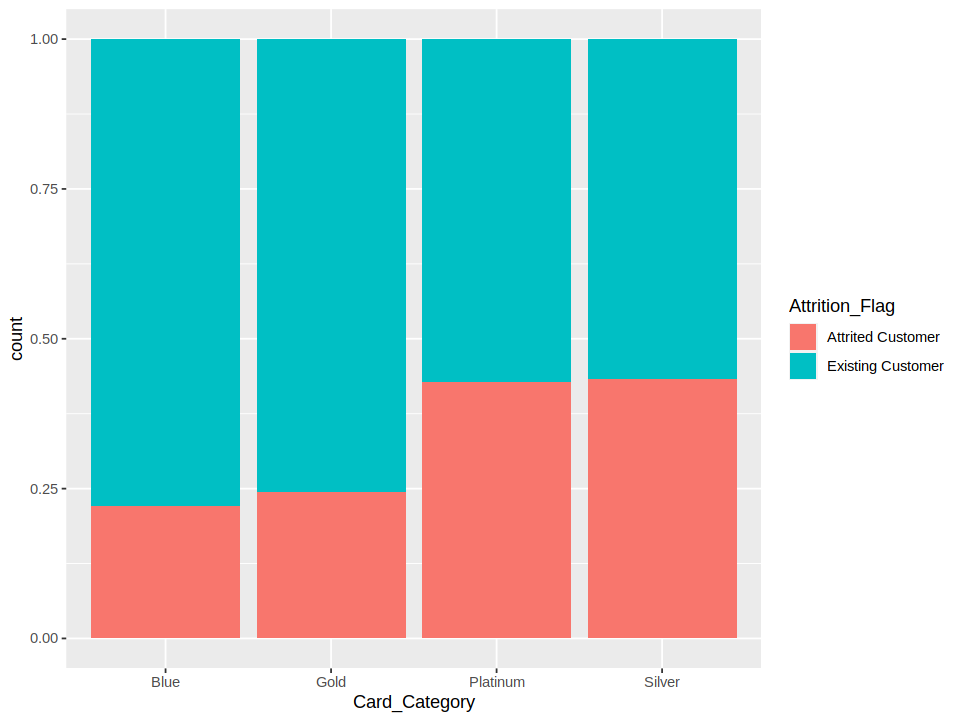

In [15]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(data, aes(x = Card_Category, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

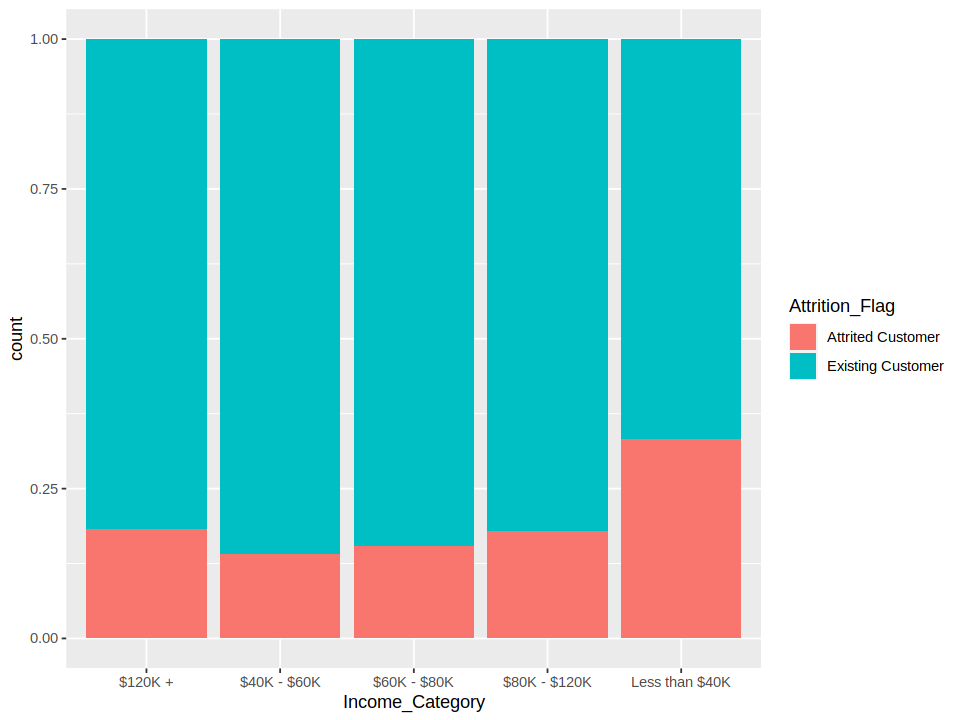

In [16]:
ggplot(data, aes(x = Income_Category, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

In [39]:
ggplot(data, aes(x = age_group, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) +
      scale_y_continuous(labels = scales::percent) +
#use positions to plot labels
  geom_text(aes(label = paste0(100*value,"%"),y=labelpos),size = 3)

ERROR while rich displaying an object: Error in `geom_text()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 2nd layer.
Caused by error in `paste0()`:
! object 'value' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = e

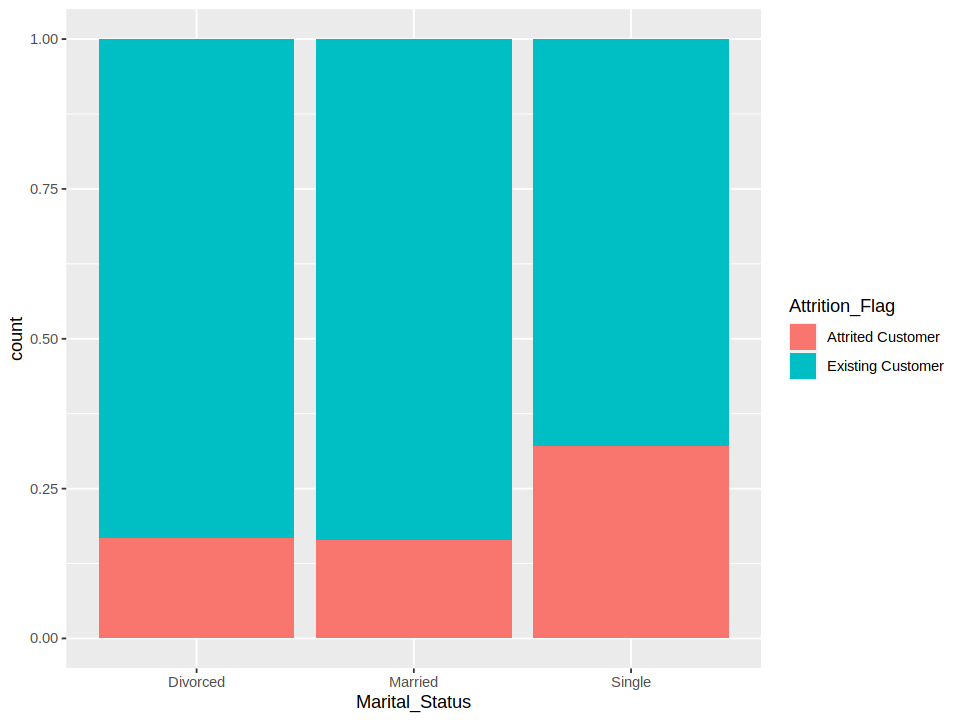

In [18]:
ggplot(data, aes(x = Marital_Status, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

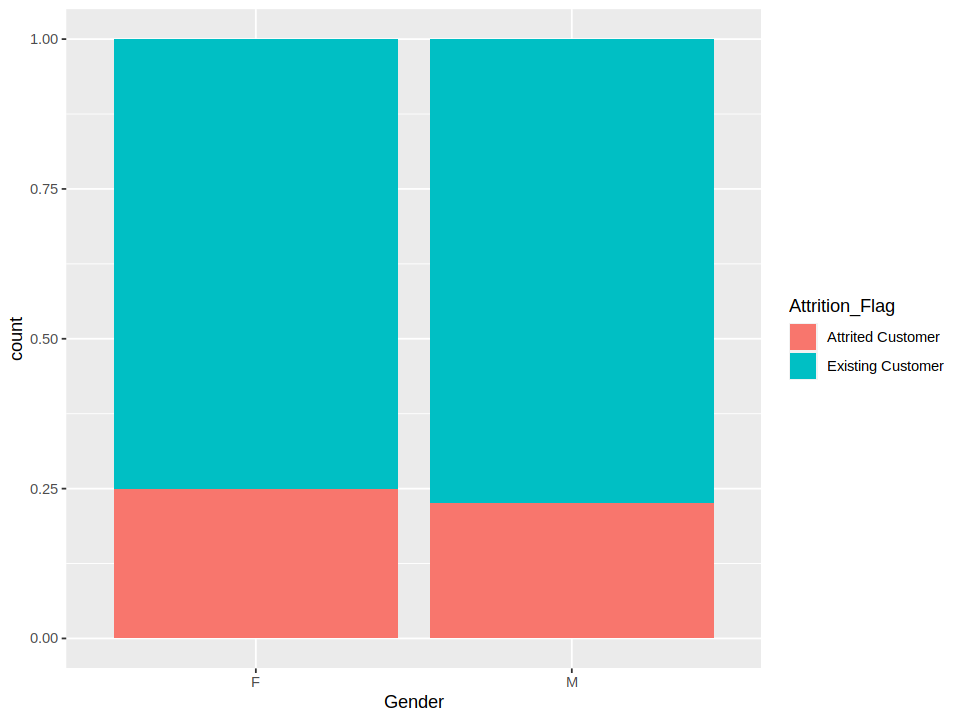

In [19]:
ggplot(data, aes(x = Gender, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

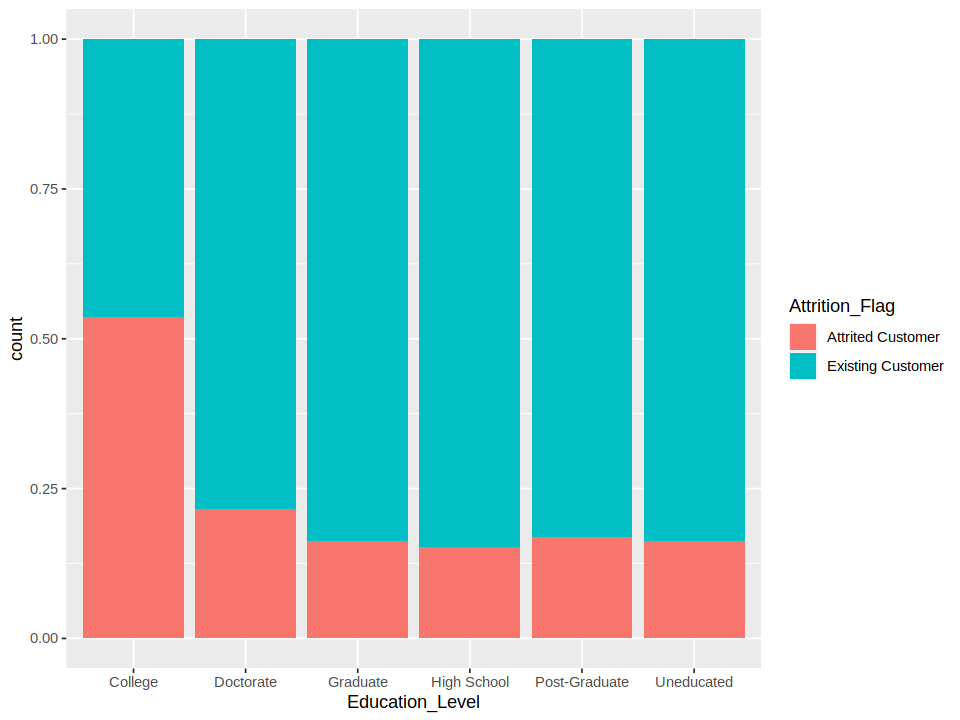

In [20]:
ggplot(data, aes(x = Education_Level, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

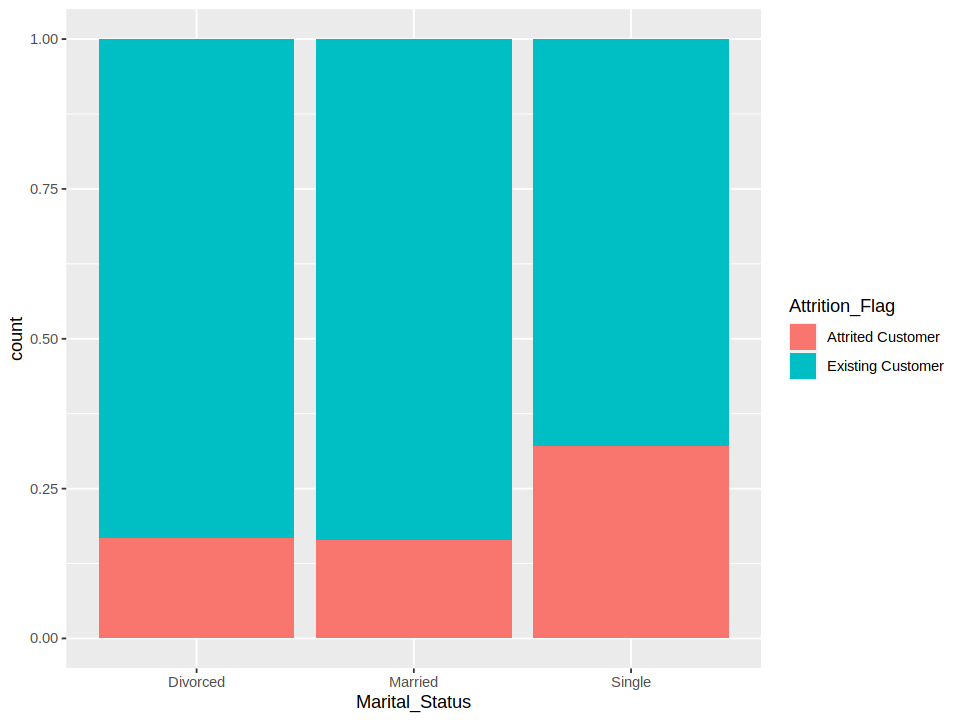

In [21]:
ggplot(data, aes(x = Marital_Status, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

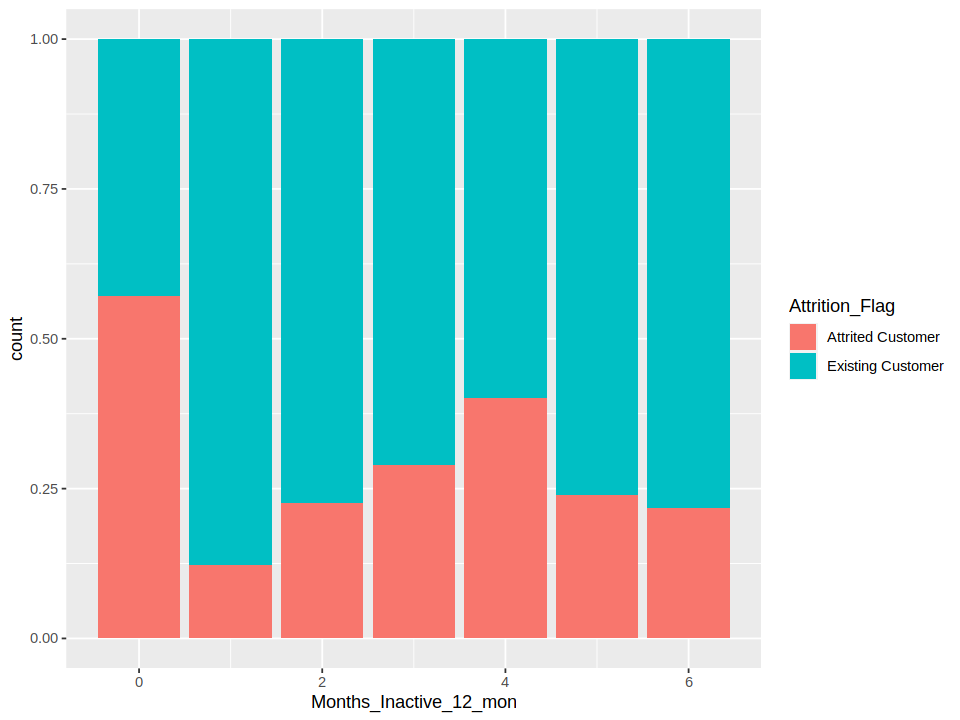

In [22]:
ggplot(data, aes(x = Months_Inactive_12_mon, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

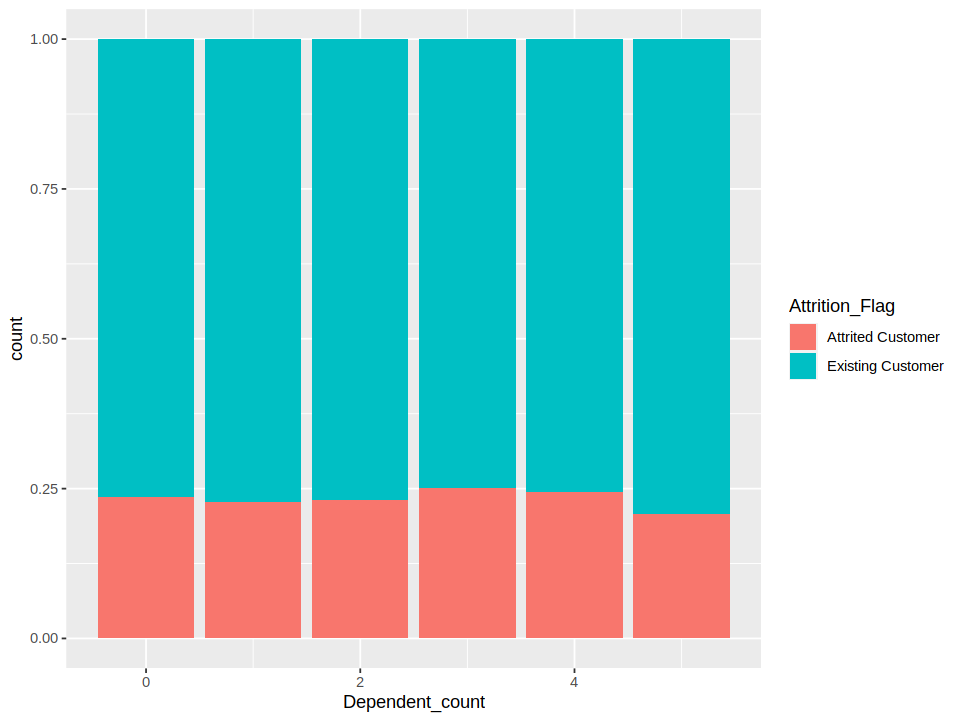

In [23]:
ggplot(data, aes(x = Dependent_count, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

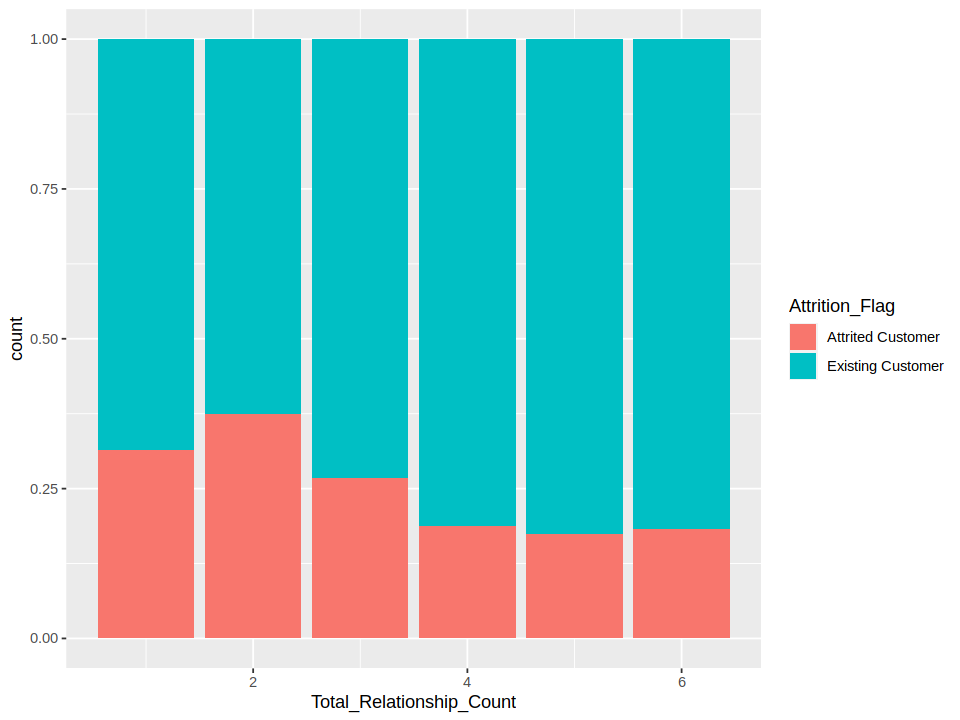

In [24]:
ggplot(data, aes(x = Total_Relationship_Count, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

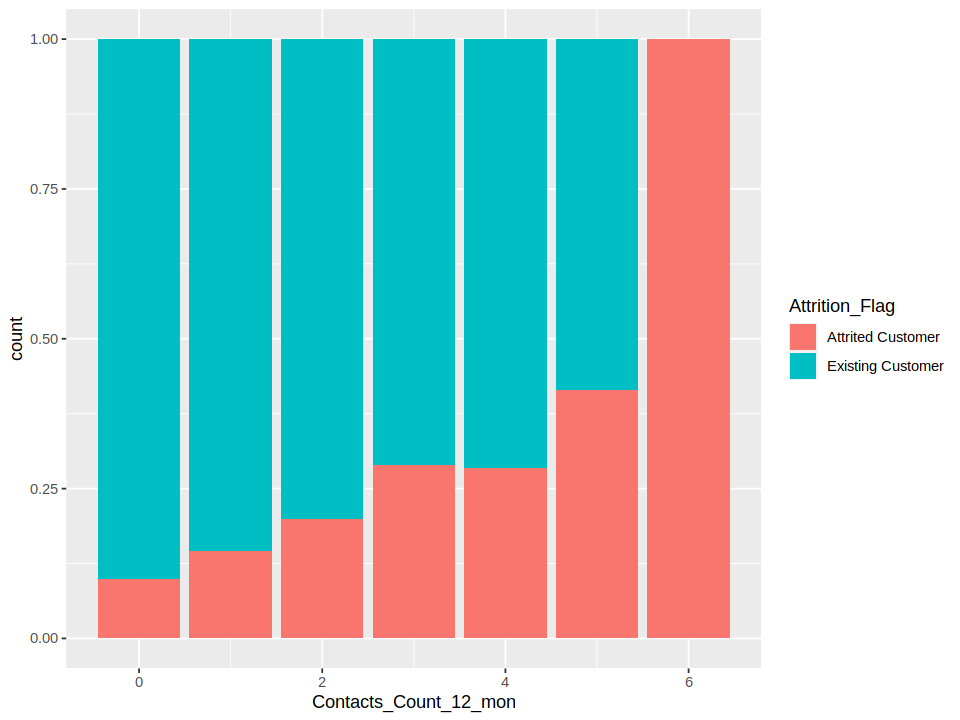

In [25]:
ggplot(data, aes(x = Contacts_Count_12_mon, fill = Attrition_Flag)) +
    geom_bar(position = position_fill(reverse=TRUE)) 

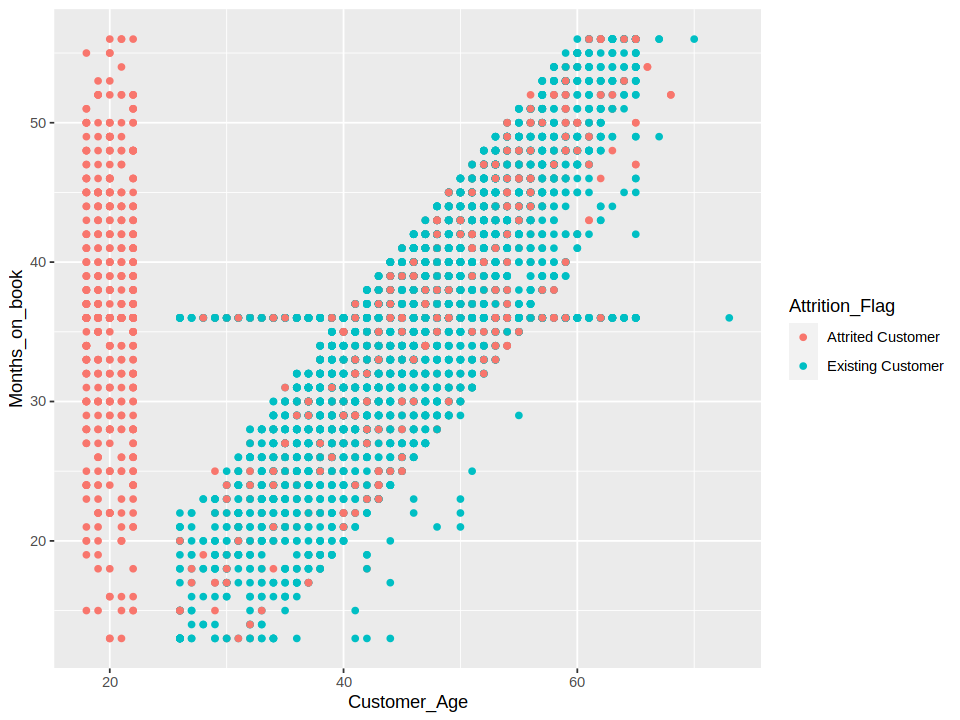

In [26]:
data %>%
  ggplot(aes(x = Customer_Age, y = Months_on_book, color = Attrition_Flag)) +
  geom_point()

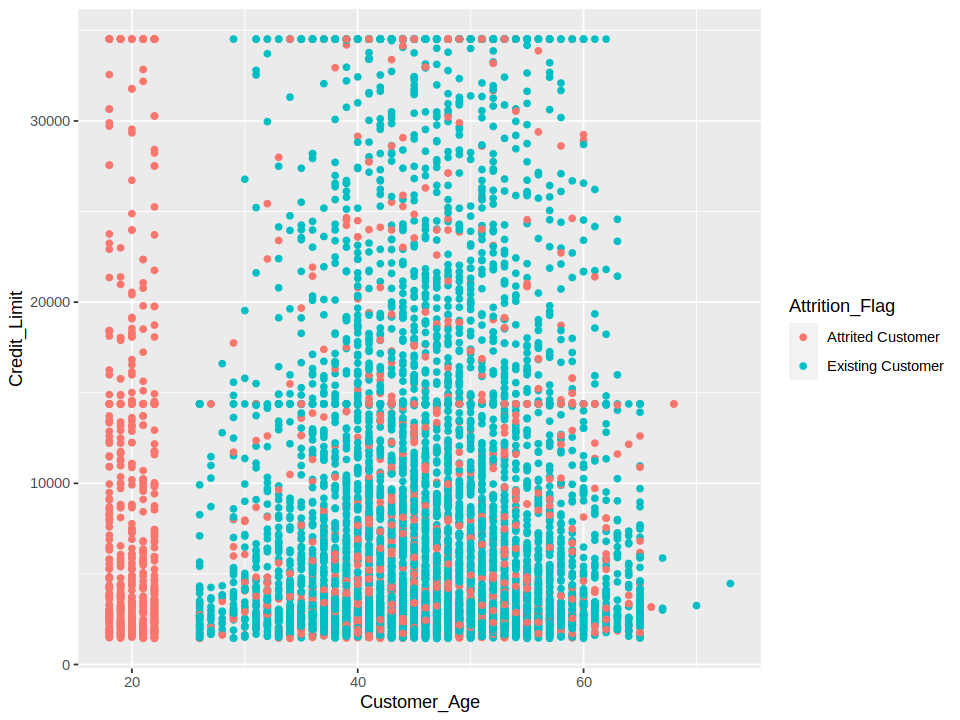

In [27]:
data %>%
  ggplot(aes(x = Customer_Age, y = Credit_Limit, color = Attrition_Flag)) +
  geom_point()

### Comments and directions for analysis

**Comments**
- Subsets prone to attrition: 
     * `age_group`: 18 - 25
     * `Income_Category`: Less than $40k
     * `Marital_Status`: Single
     * `Education_Level`: College
     * `Months_Inactive_12_mon`: 0
     * `Contacts_Count_12_mon`: 6
- Within each card category, silver has the highest turnover rate even though blue has the highest number of attrited customers (most likely because blue card is the most popular)

**Direction**
- Analyse the characteristics of attrited group only - `attritioned` dataset (done by Thu hihi) => patterns to why they left
- Analyse the characteristics of exisiting group only - `existing` dataset => patterns to why they stay
- Analyse according to `Card_Category` => find common characteristics

### `Attritioned`

In [28]:
summary(attritioned$Customer_Age)
summary(attritioned$Credit_Limit)
summary(attritioned$Months_on_book)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   22.00   43.00   39.09   50.00   68.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1439    2758    5384    9151   13740   34516 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   32.00   36.00   36.39   41.00   56.00 

### `Existing`

In [29]:
# Quantitative
summary(existing$Customer_Age)
summary(existing$Credit_Limit)
summary(existing$Months_on_book)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  26.00   41.00   46.00   46.28   52.00   73.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1439    2786    5370    9272   13474   34516 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   31.00   36.00   35.89   40.00   56.00 

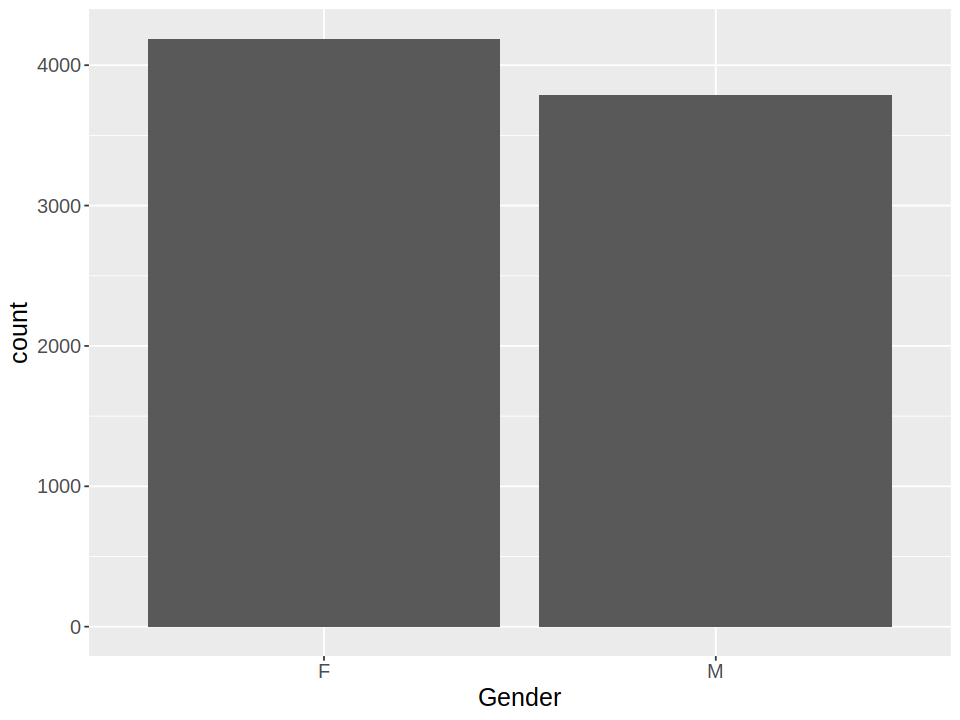

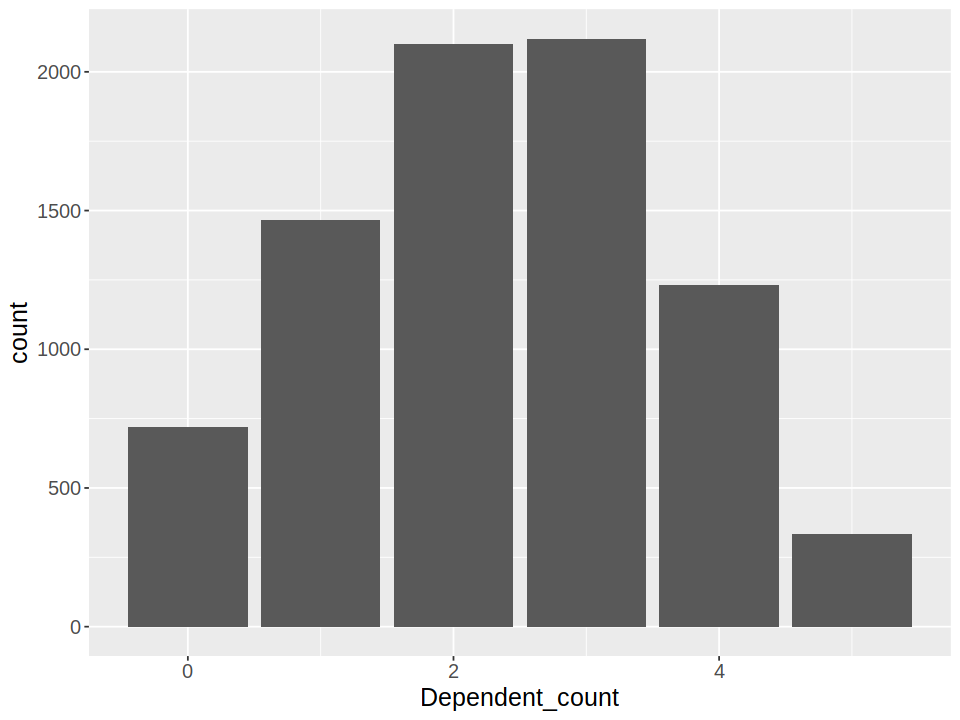

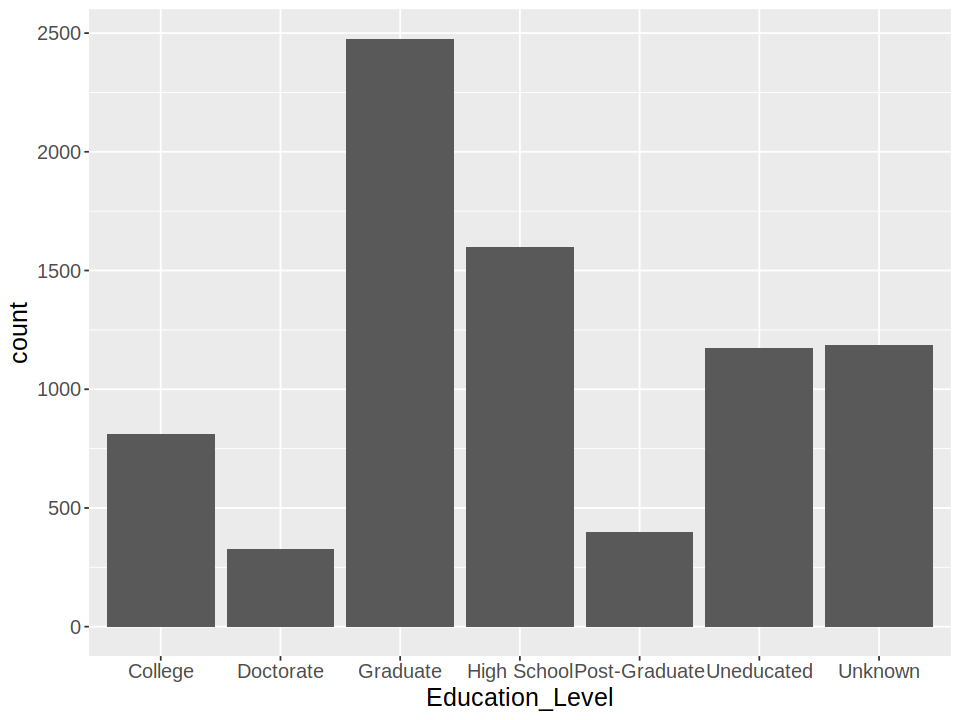

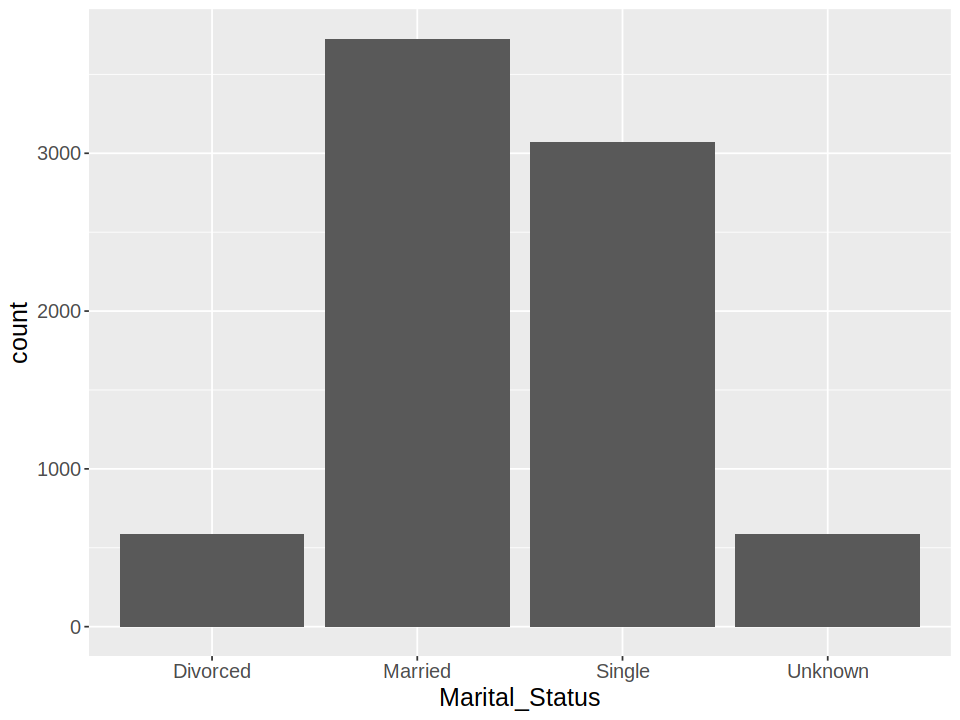

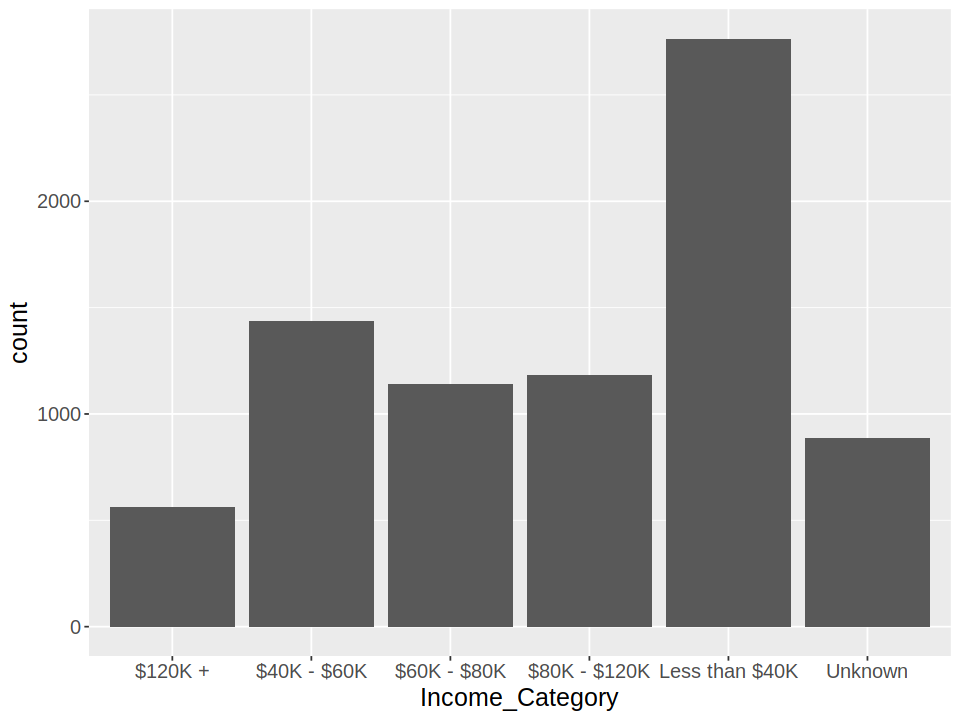

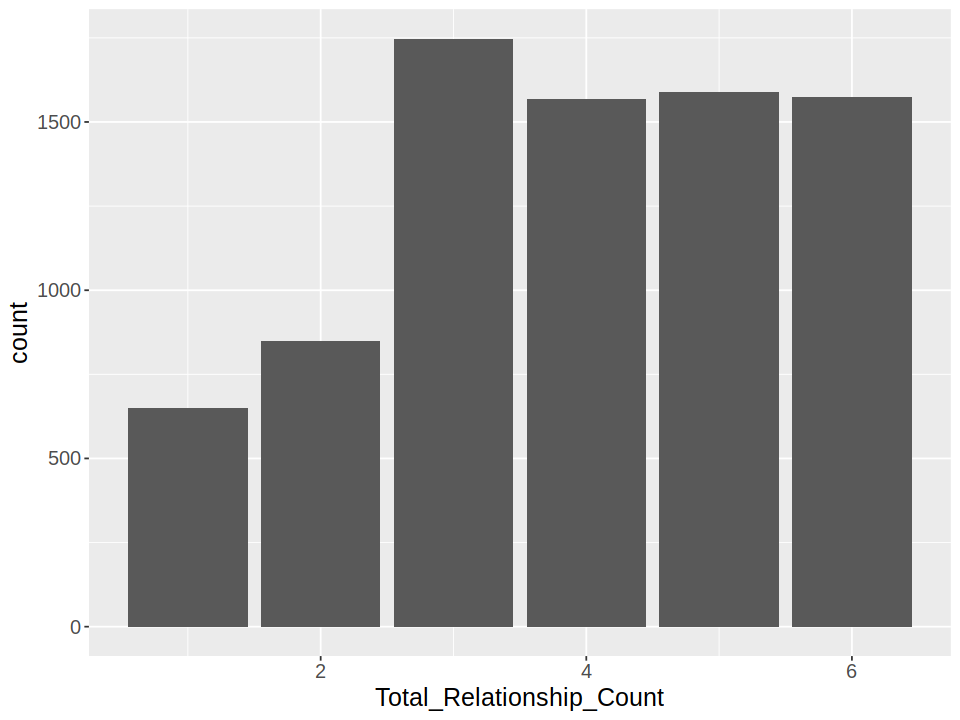

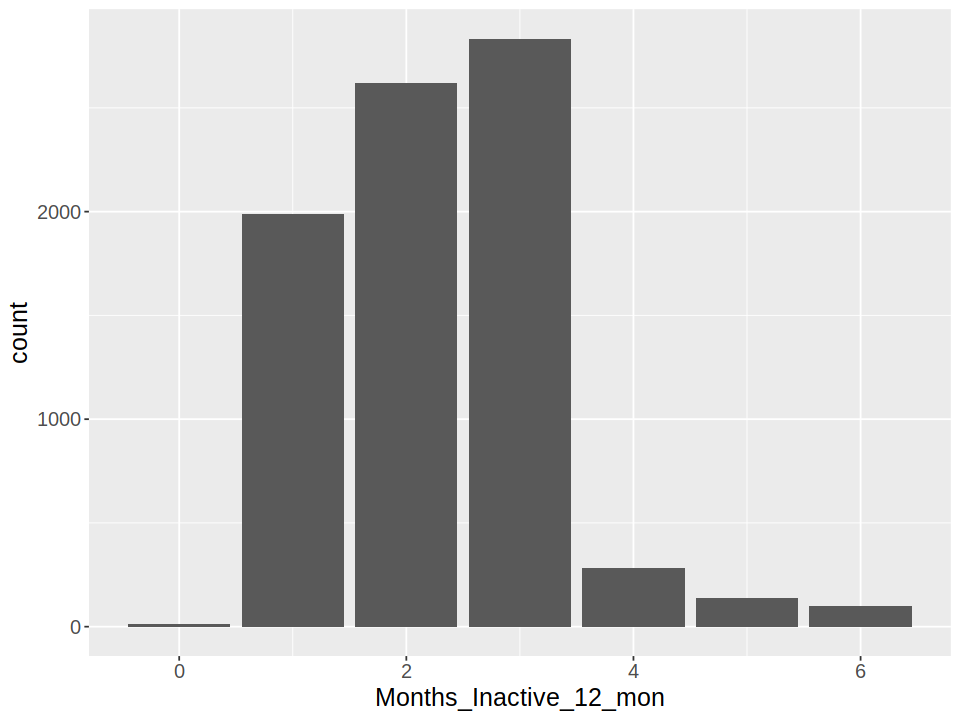

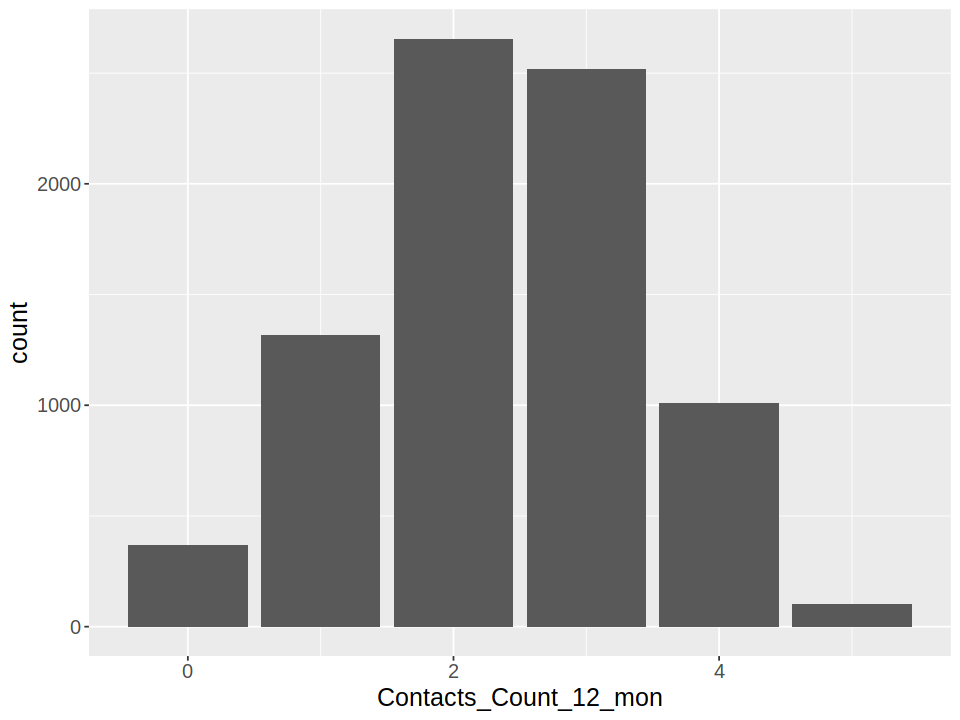

In [30]:
# Categorical
ggplot(existing, aes(x = Gender)) +
    geom_bar() +
    theme(text = element_text(size = 15))

ggplot(existing, aes(x = Dependent_count)) +
    geom_bar() +
    theme(text = element_text(size = 15))

ggplot(existing, aes(x = Education_Level)) +
    geom_bar() +
    theme(text = element_text(size = 15))

ggplot(existing, aes(x = Marital_Status)) +
    geom_bar() +
    theme(text = element_text(size = 15))

ggplot(existing, aes(x = Income_Category)) +
    geom_bar() +
    theme(text = element_text(size = 15))

ggplot(existing, aes(x = Total_Relationship_Count)) +
    geom_bar() +
    theme(text = element_text(size = 15))

ggplot(existing, aes(x = Months_Inactive_12_mon)) +
    geom_bar() +
    theme(text = element_text(size = 15))

ggplot(existing, aes(x = Contacts_Count_12_mon)) +
    geom_bar() +
    theme(text = element_text(size = 15))

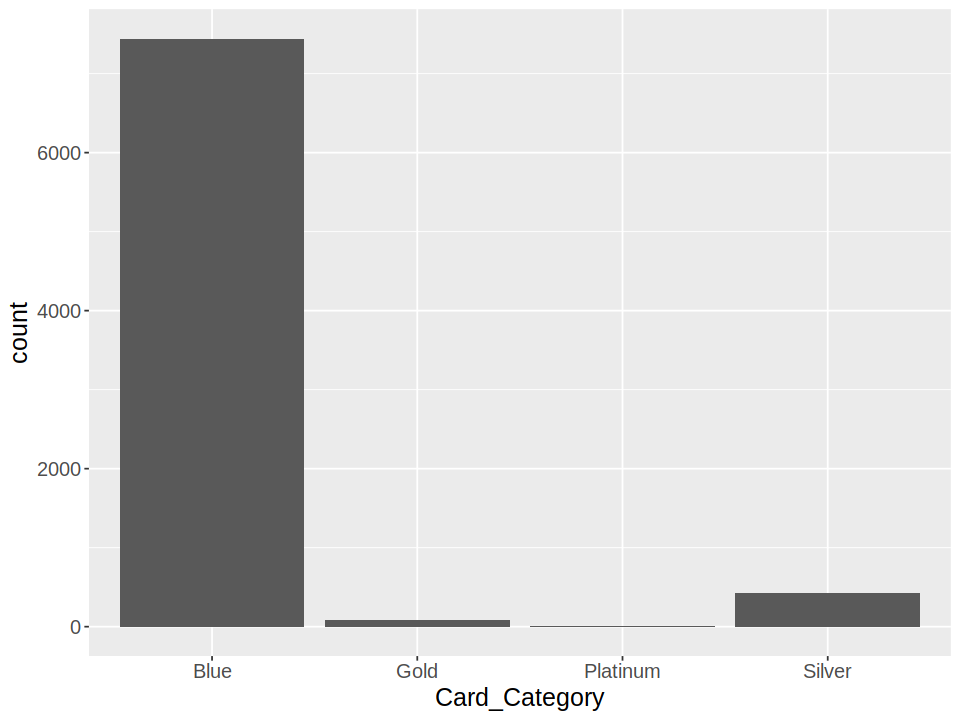

In [31]:
ggplot(existing, aes(x = Card_Category)) +
    geom_bar() +
    theme(text = element_text(size = 15))

### `Card_Category`

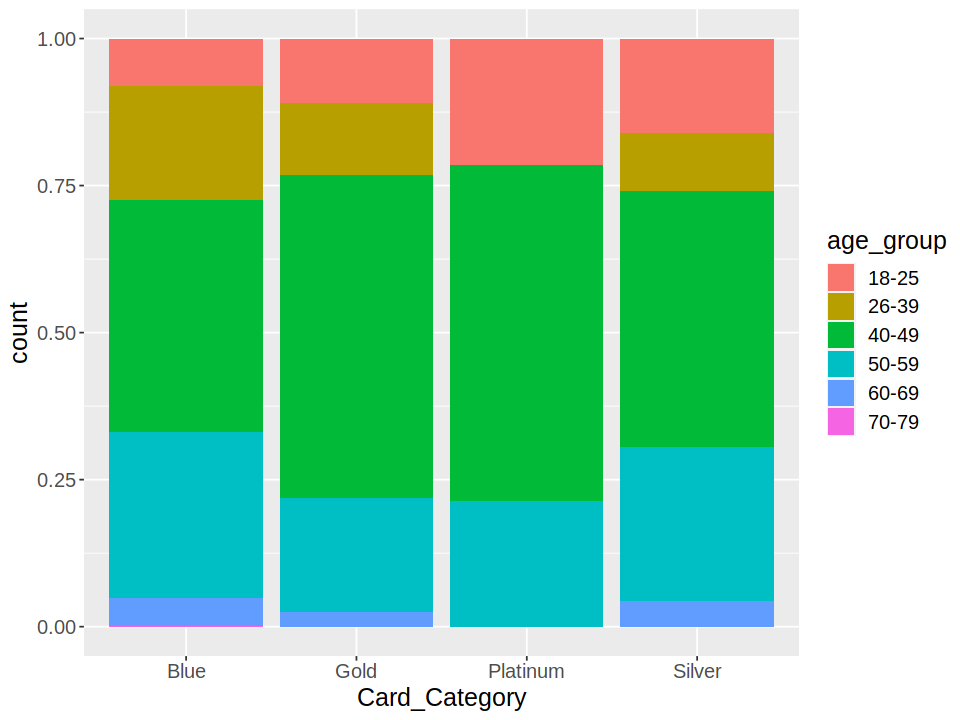

In [32]:
ggplot(data, aes(x = Card_Category, fill = age_group)) +
    geom_bar(position = 'fill') +
    theme(text = element_text(size = 15))

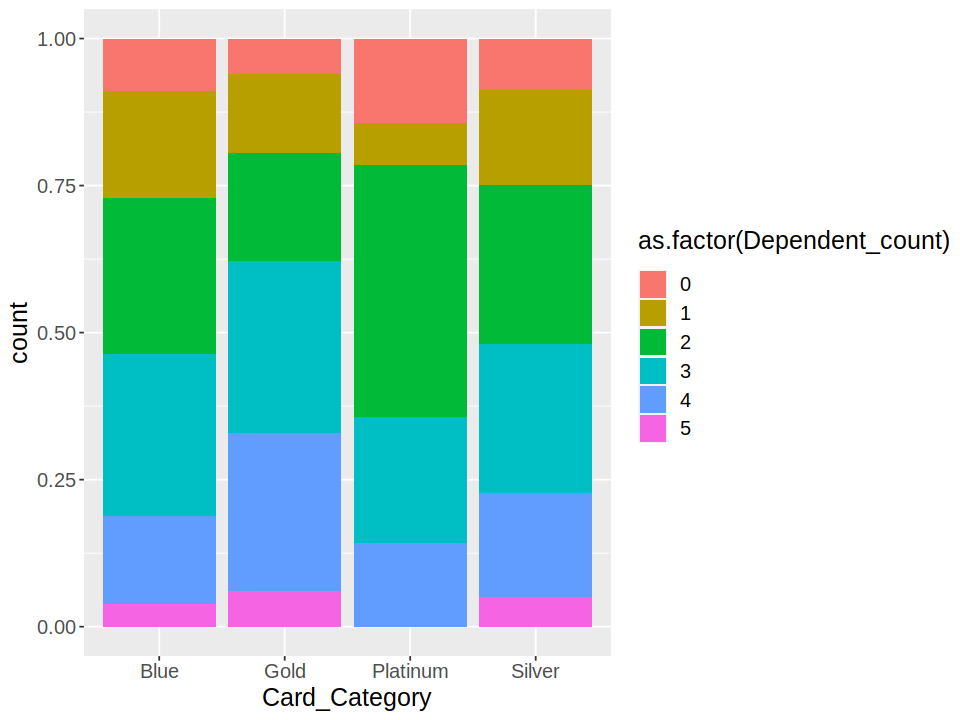

In [34]:
ggplot(data, aes(x = Card_Category, fill = as.factor(Dependent_count))) +
    geom_bar(position = 'fill') +
    theme(text = element_text(size = 15))